### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import reuters
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, Dense
import numpy as np
import matplotlib.pyplot as plt
import random

c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Define Constants

In [22]:
NUM_WORDS = 50000

### Data

In [23]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=NUM_WORDS)

c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [49]:
word_to_index: dict = reuters.get_word_index()
index_to_word: dict = {value: key for (key, value) in word_to_index.items()}
def word_of(ind: int):
    return index_to_word.get(ind - 3, "?")
def sentence_of(sample: list):
    return " ".join(word_of(i) for i in sample)

In [50]:
def vectorize_samples(samples):
    result = np.zeros((len(samples), NUM_WORDS))
    for ind, words in enumerate(samples):
        result[ind, words] += 1
    return result

def to_one_hot(samples, dimensions=46):
    results = np.zeros((len(samples), dimensions))
    for ind, val in enumerate(samples):
        results[ind, val] = 1
    return results

In [51]:
x_train = vectorize_samples(train_data)
x_test = vectorize_samples(test_data)
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

x_val = x_train[:1000]
y_val = y_train[:1000]
x_train = x_train[1000:]
y_train = y_train[1000:]

### Network

In [52]:
model = models.Sequential()
# model.add(Dense(64, activation="relu", input_shape=(NUM_WORDS,)))
# model.add(Dense(64, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(Dense(46, activation="softmax", kernel_regularizer=keras.regularizers.l2(), input_shape=(NUM_WORDS,)))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [54]:
history = model.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/5
16/16 [==============================] - 7s 230ms/step - loss: 0.3100 - accuracy: 0.9380 - val_loss: 0.9684 - val_accuracy: 0.7980

### Display Results

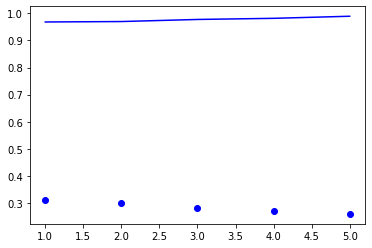

In [55]:
history_dict = history.history
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")

In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("EVALUATION")
print("Accuracy:", test_acc)
print("Loss:", test_loss)

71/71 [==============================] - 0s 3ms/step - loss: 1.1033 - accuracy: 0.7792
EVALUATION
Accuracy: 0.7791629433631897
Loss: 1.1033071279525757


#### Prediction

In [57]:
for i in range(10):
    print(sentence_of(test_data[i]))
    prediction = model.predict(x_test[i].reshape((1, -1)))
    print(np.argmax(prediction[0]))

? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3
3
? philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yulo told reut

#### Experimental